[Dataset](https://github.com/JeffSackmann/tennis_atp)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Directory and version specifications

In [2]:
from datetime import datetime

MODEL_TIMESTAMP = datetime.now().strftime("%Y-%m-%d__%H-%M-%S")

DATA_PATH = 'data/'

CLASSIFICATION_REPORTS_PATH = 'classification_reports/'
CONFUSION_MATRIX_PATH = 'confusion_matrix/'
TREE_PATH = 'tree/'

# Resolución de imágenes
resolution = 300

# Download and Store Data

In [3]:
# for index in range(0,22):
#     index_str = str(index)

#     print(index_str)
    
#     if len(index_str) == 1:
#         index_str = '0' + index_str

#     print(index_str)

#     url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_20{}.csv".format(index_str)
#     print(url)

#     FILE_NAME = "atp_matches_20{}.csv".format(index_str)

#     df = pd.read_csv(url, index_col=0, parse_dates=[0])
#     df.to_csv(DATA_PATH + FILE_NAME)

# # data_frame = pd.read_csv(DATA_PATH + FILE_NAME)

# Load Data

In [4]:
atp = pd.DataFrame()

years_index_20_22 = range(0,22)

for index in years_index_20_22:
    index_str = str(index)

    if len(index_str) == 1:
        index_str = '0' + index_str

    FILE_NAME = "atp_matches_20{}.csv".format(index_str)

    data_frame_iter = pd.read_csv(DATA_PATH + FILE_NAME)
    atp = pd.concat([atp, data_frame_iter])

pd.set_option('display.max_columns', None)
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


In [5]:
# COLUMNS_TO_REMOVE = ["tourney_id", "tourney_name", "tourney_date",
#                      "match_num",
#                      "winner_id", "loser_id",
#                      "winner_seed", "loser_seed",
#                      "winner_name", "loser_name",
#                      "winner_ioc", "loser_loc",
#                      "winner_rank", "loser_rank",
#                      "winner_rank_points", "loser_rank_points",
#                      "round"]

# Clean Dataset

In [6]:
round_replace = {'R128': 128,
                  'R64': 64,
                  'R32': 32,
                  'R16': 16,
                  'QF': 4,
                  'SF': 2,
                  'F': 1
}

# Eliminamos las Round Robin (RR y ER)
atp['round'].replace(round_replace, inplace = True)

In [7]:
accident_type_replace = {}
for index,accident_type in enumerate(atp.tourney_name.unique()):
    if not pd.isna(accident_type): accident_type_replace[accident_type] = int(index)
    
atp['tourney_name'].replace(accident_type_replace, inplace = True)


In [8]:
COLUMNS_TO_GET = [
                  "surface",
                  "minutes",
                  "winner_ht", "loser_ht",
                  "w_ace", "l_ace",
                  "w_svpt", "l_svpt", # service points
                  "w_1stWon", "l_1stWon",
                  "w_2ndWon", "l_2ndWon",
                  "w_bpSaved", "l_bpSaved",
                  "w_bpFaced", "l_bpFaced",
                  "w_SvGms", "l_SvGms", # service games won
                  "winner_rank_points", "loser_rank_points",
                  "round",
                 ]

In [9]:
atp = atp.loc[:, atp.columns.isin(COLUMNS_TO_GET)]

atp = atp[atp['round'] != 'RR']
atp = atp[atp['round'] != 'ER']

atp = atp.dropna()

# data_frame = data_frame.loc[:, ~data_frame.columns.isin(COLUMNS_TO_REMOVE)]
# data_frame = data_frame.loc[:, ~data_frame.columns.isin(COLUMNS_TO_GET)]

In [10]:
from sklearn.utils import resample

hard_data = atp[atp['surface'] == 'Hard']
clay_data = atp[atp['surface'] == 'Clay']
grass_data  = atp[atp['surface'] == 'Grass']
carpet_data = atp[atp['surface'] == 'Carpet']

X_hard_downsampled = resample(hard_data,
                                replace = True,
                                n_samples = len(carpet_data))

X_clay_downsampled = resample(clay_data,
                                 replace = True,
                                 n_samples = len(carpet_data))

X_grass_downsampled = resample(grass_data,
                                 replace = True,
                                 n_samples = len(carpet_data))

atp = pd.concat([X_hard_downsampled, X_clay_downsampled, X_grass_downsampled, carpet_data])

In [11]:
labels = atp["surface"]
atp = atp.drop(columns=["surface"])

In [12]:
labels.value_counts()

Hard      1402
Clay      1402
Grass     1402
Carpet    1402
Name: surface, dtype: int64

Para Clasificación de:

- Tipo de pista: `l_1stWon`, `winner_ht`, `loser_ht`, `w_1stWon`, `l_1stWon`
- Nivel de torneo: `Draw_size`, `winner_rank_points`, `loser_rank_points`, `loser_rank`, `winner_rank`

# Decision Tree with CV

Buscar mediante cross-validation el mejor valor del parámetro ´max_depth´

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree

splits = 10
cv = KFold(n_splits = splits, shuffle = True)

depths = range (2,20)
best_accuracy = 0

for depth in depths:
    mean_score = 0.0

    for train_index, test_index in cv.split(atp):

        #print("TRAIN:", train_index, "TEST:", test_index)

        #Seleccionamos los datos
        x_train, y_train = atp.iloc[train_index], labels.iloc[train_index]
        x_test, y_test   = atp.iloc[test_index],  labels.iloc[test_index]

        #Declaramos modelo
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(x_train, y_train)

        accuracy = model.score(x_test,y_test)

        mean_score = mean_score + accuracy

        # print("Accuracy: ", accuracy)
        
    mean_score = mean_score/splits
    print(f"Depth: {depth}, mean score: {mean_score}")

    if (mean_score > best_accuracy):
        best_accuracy = mean_score
        best_model = model
    
    print(f"Best mean score: {best_accuracy}, best depth: {best_model.get_depth()}")

print("Done!")

Depth: 2, mean score: 0.40317449707155595
Best mean score: 0.40317449707155595, best depth: 2
Depth: 3, mean score: 0.4140473007384772
Best mean score: 0.4140473007384772, best depth: 3
Depth: 4, mean score: 0.4238607715813599
Best mean score: 0.4238607715813599, best depth: 4
Depth: 5, mean score: 0.43348707664884134
Best mean score: 0.43348707664884134, best depth: 5
Depth: 6, mean score: 0.4343850267379679
Best mean score: 0.4343850267379679, best depth: 6
Depth: 7, mean score: 0.43599057804940156
Best mean score: 0.43599057804940156, best depth: 7
Depth: 8, mean score: 0.43865291571173926
Best mean score: 0.43865291571173926, best depth: 8
Depth: 9, mean score: 0.4276031321619557
Best mean score: 0.43865291571173926, best depth: 8
Depth: 10, mean score: 0.4279586834733894
Best mean score: 0.43865291571173926, best depth: 8
Depth: 11, mean score: 0.427255538579068
Best mean score: 0.43865291571173926, best depth: 8
Depth: 12, mean score: 0.4183304685510568
Best mean score: 0.4386529

## Tree Plot

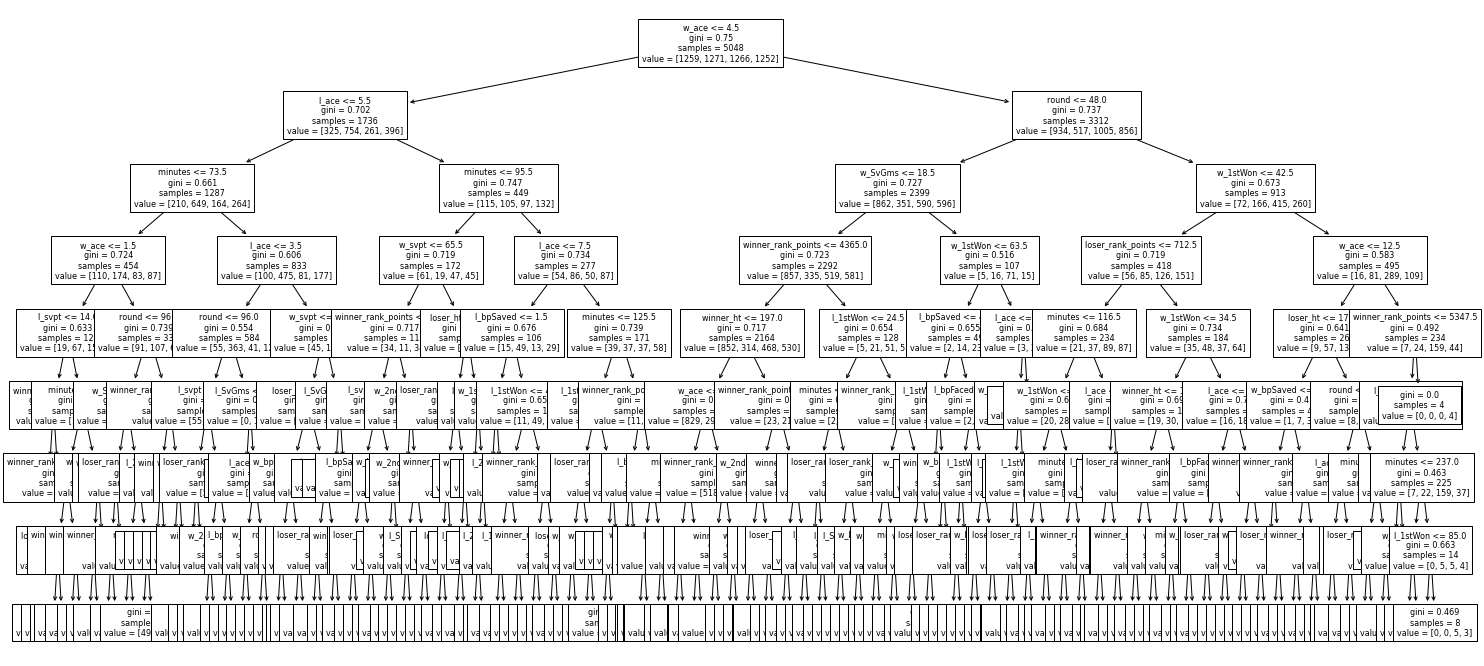

In [14]:
plt.figure(figsize=(25,12))  # set plot size (denoted in inches)
tree_plot = tree.plot_tree(best_model, fontsize=8, feature_names = atp.columns)

# Save Confusion Matrix image
FILE_NAME = f"best_depth_{best_model.get_depth()}_tree_{MODEL_TIMESTAMP}"

plt.savefig(TREE_PATH + FILE_NAME, dpi = resolution)

## Confusion Matrix

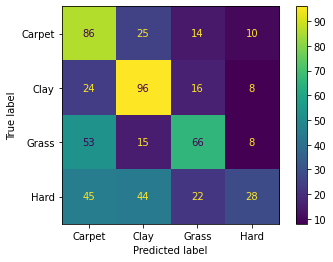

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Save Confusion Matrix image
FILE_NAME = f"best_depth_{best_model.get_depth()}_cm_{MODEL_TIMESTAMP}"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

## Classification Report

In [16]:
from sklearn.metrics import classification_report

# Save Classification Report csv
FILE_NAME = f"best_depth_{best_model.get_depth()}_cr_{MODEL_TIMESTAMP}.csv"

y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)
display(report_df)

,precision,recall,f1-score,support
Carpet,0.384615,0.444444,0.412371,135.000000
Clay,0.496350,0.472222,0.483986,144.000000
Grass,0.495935,0.429577,0.460377,142.000000
Hard,0.312500,0.323741,0.318021,139.000000
accuracy,0.417857,0.417857,0.417857,0.417857
macro avg,0.422350,0.417496,0.418689,560.000000
weighted avg,0.423675,0.417857,0.419540,560.000000


# Decision Tree with GridSearch

Buscar los mejores parámetros mediante el método ´GridSearch´

In [17]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X = atp
y = labels

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1]+1, 1))

criterion = ['gini', 'entropy']
max_depth = depths

parameters = dict(pca__n_components = n_components,
                  dec_tree__criterion = criterion,
                  dec_tree__max_depth = max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

best_criterion = clf_GS.best_estimator_.get_params()['dec_tree__criterion']
best_max_depth = clf_GS.best_estimator_.get_params()['dec_tree__max_depth'] 

print('Best Criterion:', best_criterion)
print('Best max_depth:', best_max_depth)
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 8
Best Number Of Components: 15
DecisionTreeClassifier(criterion='entropy', max_depth=8)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree

splits = 10

cv = KFold(n_splits = splits, shuffle = True)

best_accuracy = 0

mean_score = 0.0
for train_index, test_index in cv.split(atp):

    x_train, y_train = atp.iloc[train_index], labels.iloc[train_index]
    x_test, y_test   = atp.iloc[test_index],  labels.iloc[test_index]

    model = DecisionTreeClassifier(criterion = best_criterion,
                                   max_depth = best_max_depth)
    model.fit(x_train, y_train)

    accuracy = model.score(x_test,y_test)

    mean_score = mean_score + accuracy


mean_score = mean_score/splits

print("Mean: ", mean_score)
print("Done!")

Mean:  0.42206678125795777
Done!


## Tree plot

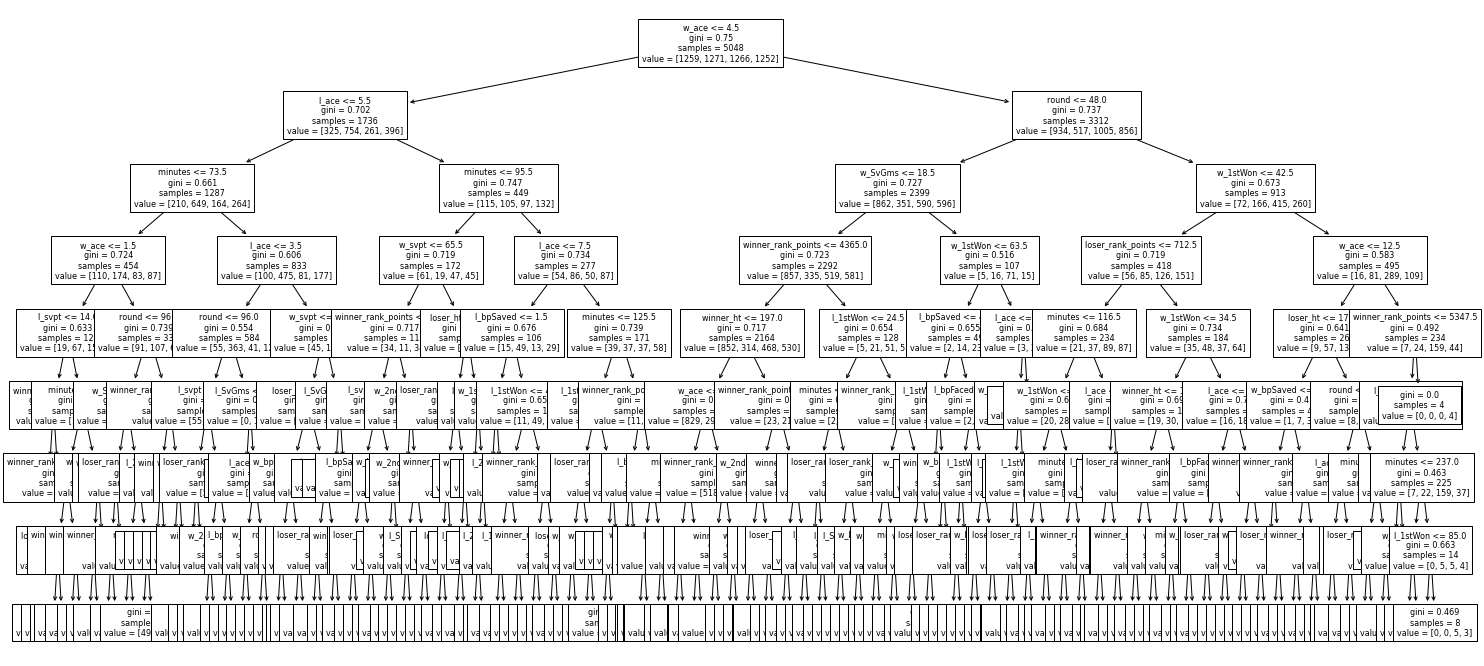

In [19]:
plt.figure(figsize=(25,12))  # set plot size (denoted in inches)
tree_plot = tree.plot_tree(best_model, fontsize=8, feature_names = atp.columns)

# Save Confusion Matrix image
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_tree_{MODEL_TIMESTAMP}"

plt.savefig(TREE_PATH + FILE_NAME, dpi = resolution)

## Confusion Matrix

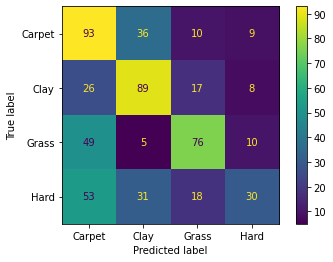

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Save Confusion Matrix image
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cm_{MODEL_TIMESTAMP}"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

## Classification Report

In [21]:
from sklearn.metrics import classification_report

# Save Classification Report csv
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cr_{MODEL_TIMESTAMP}.csv"

y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)
display(report_df)

,precision,recall,f1-score,support
Carpet,0.392562,0.641892,0.487179,148.000000
Clay,0.436782,0.542857,0.484076,140.000000
Grass,0.517241,0.321429,0.396476,140.000000
Hard,0.280702,0.121212,0.169312,132.000000
accuracy,0.414286,0.414286,0.414286,0.414286
macro avg,0.406822,0.406847,0.384261,560.000000
weighted avg,0.408420,0.414286,0.388802,560.000000
